In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
import imageio
from nltk.corpus import stopwords
from collections import Counter
from operator import itemgetter

In [2]:
df= pd.read_csv('netflix_titles_nov_2019.csv.zip')

In [3]:
df.head(10)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


In [4]:
## CHECKING FOR DATA TYPES(VALIDATING THE DATA)
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [5]:
df['show_id']=df['show_id'].astype('object')


In [6]:
df.dtypes

show_id         object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [7]:
### Converting date object to datetime
df['date_added']=pd.to_datetime(df['date_added'])
df['date_added']

0      2019-11-30
1      2019-11-30
2      2019-11-30
3      2019-11-29
4             NaT
          ...    
5832   2010-11-01
5833   2009-11-18
5834   2009-05-05
5835   2008-02-04
5836   2008-01-01
Name: date_added, Length: 5837, dtype: datetime64[ns]

In [8]:
df['year_added']= df['date_added'].dt.year
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,2010.0
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,2009.0
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,2009.0
5835,70157452,Dinner for Five,NaN,NaN,United States,2008-02-04,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",TV Show,2008.0


In [9]:
df.iloc[4]

show_id                                                  80213643
title                                             Chip and Potato
director                                                      NaN
cast            Abigail Oliver, Andrea Libman, Briana Buckmast...
country                                    Canada, United Kingdom
date_added                                                    NaT
release_year                                                 2019
rating                                                       TV-Y
duration                                                2 Seasons
listed_in                                                Kids' TV
description     Lovable pug Chip starts kindergarten, makes ne...
type                                                      TV Show
year_added                                                    NaN
Name: 4, dtype: object

In [10]:
#### Checking for any NaN values
df.isnull().any()

show_id         False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
type            False
year_added       True
dtype: bool

In [11]:
# Checking the number of unique values per column
df.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
year_added        12
dtype: int64

In [12]:
## Replacing nan values with N/A
df= df.fillna('N/A')

In [13]:
### Create a dataframe for each year.

df_19= df.loc[df['year_added']==2019]


In [14]:
df_18=df.loc[df['year_added']==2018]

In [15]:
df_17=df.loc[df['year_added']==2017]

In [16]:
### Number of MOvies and TV Shows in 2019
df_19['type'].value_counts()


Movie      1367
TV Show     476
Name: type, dtype: int64

In [17]:
### Countries with the most content
X=df['country'].value_counts()
X=X.to_dict()
X

{'United States': 1907,
 'India': 697,
 'N/A': 427,
 'United Kingdom': 336,
 'Japan': 168,
 'Canada': 139,
 'South Korea': 133,
 'Spain': 113,
 'France': 85,
 'Mexico': 80,
 'Turkey': 78,
 'Australia': 69,
 'Taiwan': 68,
 'Hong Kong': 51,
 'Thailand': 50,
 'Egypt': 49,
 'China': 48,
 'Brazil': 48,
 'Indonesia': 43,
 'Philippines': 43,
 'Germany': 40,
 'United Kingdom, United States': 39,
 'Argentina': 38,
 'Canada, United States': 35,
 'United States, Canada': 34,
 'United States, United Kingdom': 27,
 'Nigeria': 26,
 'Colombia': 25,
 'France, Belgium': 23,
 'Italy': 21,
 'Pakistan': 18,
 'Malaysia': 17,
 'Hong Kong, China': 16,
 'China, Hong Kong': 15,
 'Singapore': 14,
 'Russia': 13,
 'Israel': 13,
 'Denmark': 12,
 'United States, Japan': 12,
 'Chile': 12,
 'Netherlands': 11,
 'Poland': 11,
 'Ireland': 11,
 'Mexico, United States': 10,
 'United States, Australia': 9,
 'United States, France': 9,
 'United States, Germany': 8,
 'United States, Mexico': 8,
 'New Zealand': 8,
 'Australia

[Text(0, 0, 'United States'),
 Text(1, 0, 'India'),
 Text(2, 0, 'N/A'),
 Text(3, 0, 'United Kingdom'),
 Text(4, 0, 'Japan'),
 Text(5, 0, 'Canada'),
 Text(6, 0, 'South Korea'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'France'),
 Text(9, 0, 'Mexico')]

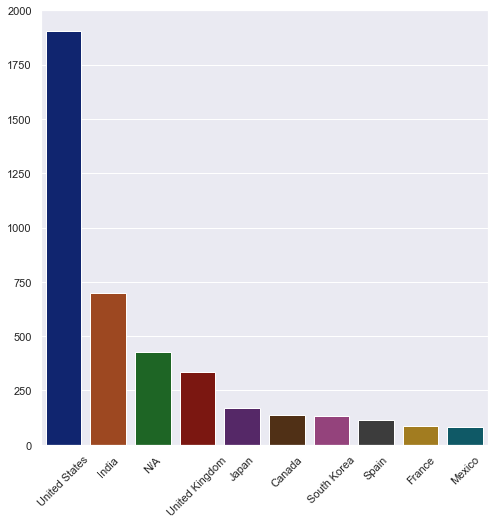

In [18]:
 ### Countries with the most content

plt.figure(figsize=(8,8))
sns.set_theme(style='darkgrid')
ax=sns.barplot(x= list(X.keys())[:10],y= list(X.values())[:10],palette="dark")
ax.set_xticklabels(list(X.keys())[:10],rotation=45)

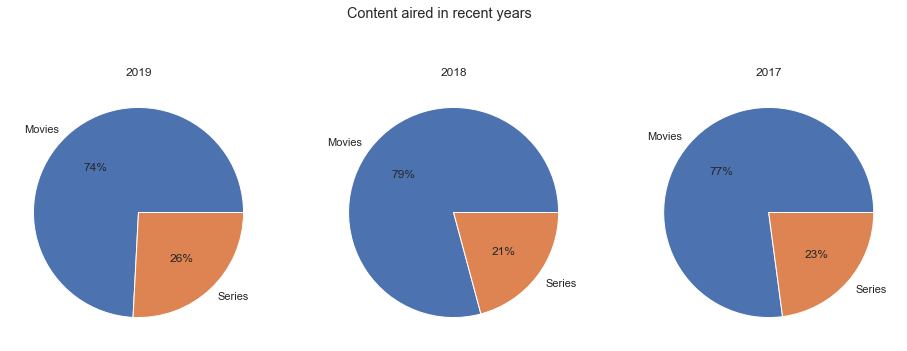

In [19]:
### Pie- chart showing the the number of movies and series added in 2019
plt.figure(figsize=(16,6))

plt.subplot(131)
plt.pie(df_19['type'].value_counts(),labels=['Movies','Series'],autopct='%.0f%%')
plt.title('2019')

plt.subplot(132)
plt.pie(df_18['type'].value_counts(),labels=['Movies','Series'],autopct='%.0f%%')
plt.title('2018')

plt.subplot(133)
plt.pie(df_17['type'].value_counts(),labels=['Movies','Series'],autopct='%.0f%%')
plt.title('2017')

plt.suptitle('Content aired in recent years')


plt.show()


In [20]:
### CReating data frames for each year with Movie type 
df_m19= df_19.loc[df_19['type']=='Movie']


In [21]:
df_m18= df_18.loc[df_18['type']=='Movie']


In [22]:
df_m17= df_17.loc[df_17['type']=='Movie']


Text(0.5, 0.98, 'Rated movies added in recent years')

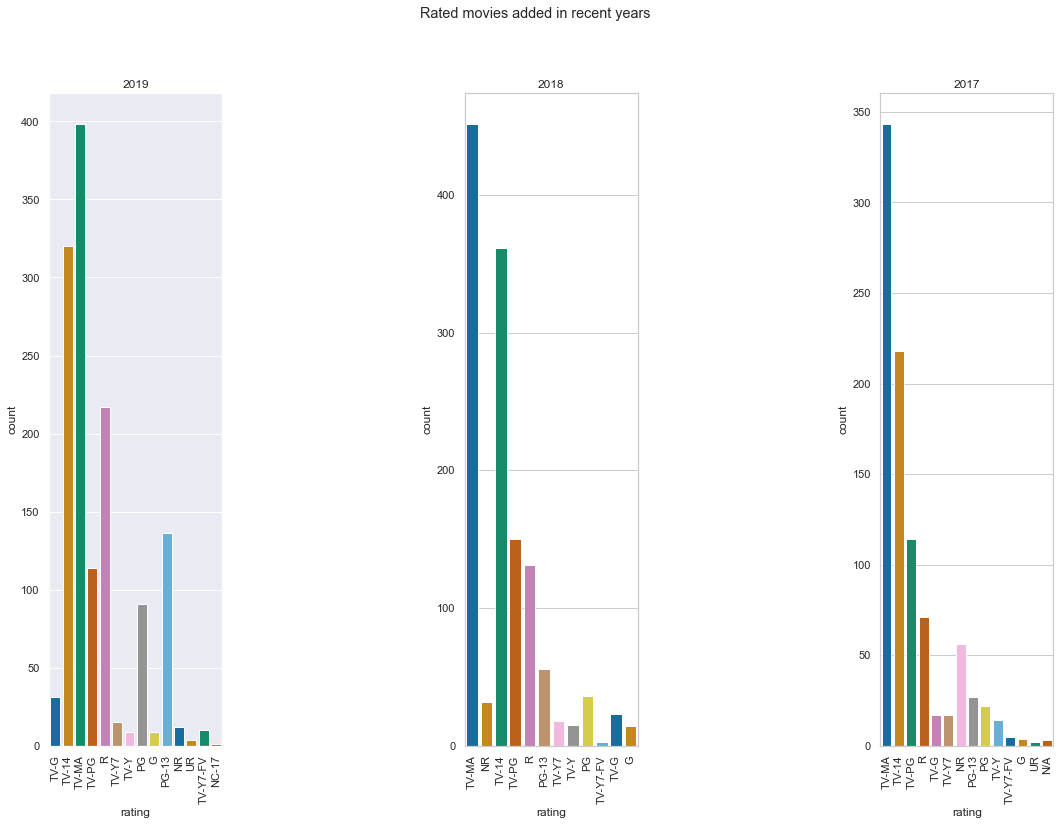

In [23]:
## Showing the rating of the various movies added in 2019
plt.figure(figsize=[18,12])


plt.subplot(151)
sns.set_theme(style='whitegrid')
ax=sns.countplot(x=df_m19['rating'],data=df_m19,palette="colorblind")
ax.set_xticklabels(df_m19['rating'].unique(),rotation=90)
plt.title('2019')

plt.subplot(153)
sns.set_theme(style='whitegrid')
ax=sns.countplot(x=df_m18['rating'],data=df_m18,palette="colorblind")
ax.set_xticklabels(df_m18['rating'].unique(),rotation=90)
plt.title('2018')

plt.subplot(155)
sns.set_theme(style='darkgrid')
ax=sns.countplot(x=df_m17['rating'],data=df_m17,palette="colorblind")
ax.set_xticklabels(df_m17['rating'].unique(),rotation=90)
plt.title('2017')

plt.suptitle('Rated movies added in recent years')

In [24]:
## Movies shown in each year
df_m= df.loc[df['type']=='Movie']


Text(0.5, 1.0, 'Number of Movies added over the years')

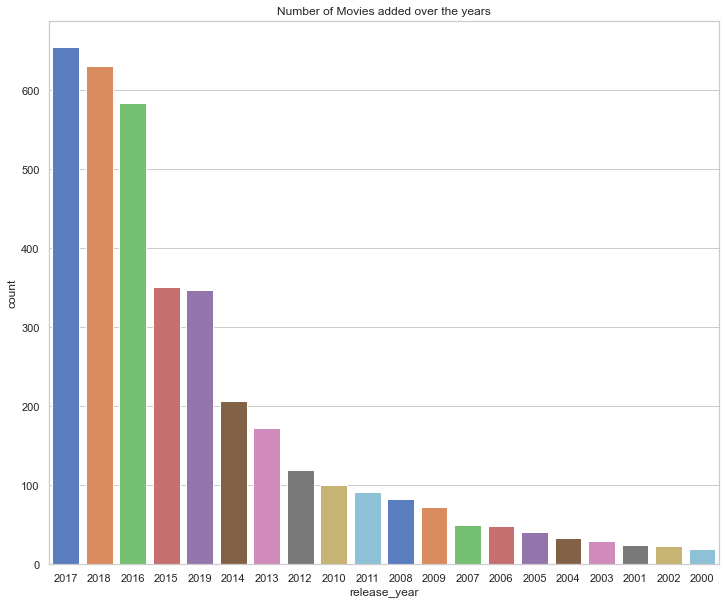

In [25]:
### Years with the most movies releaseding

plt.figure(figsize=(12,10))
sns.set_theme(style='whitegrid')
ax=sns.countplot(x=df_m['release_year'],data=df_m,palette='muted',order=df_m['release_year'].value_counts().index[:20])

plt.title('Number of Movies added over the years')


In [26]:
## The duration for TV Shows
df_s=df.loc[df['type']=='TV Show']
df_s['duration'].value_counts()

1 Season      1259
2 Seasons      298
3 Seasons      157
4 Seasons       60
5 Seasons       46
6 Seasons       21
7 Seasons       21
8 Seasons       16
9 Seasons        7
11 Seasons       3
10 Seasons       3
15 Seasons       2
13 Seasons       2
12 Seasons       2
14 Seasons       1
Name: duration, dtype: int64

Text(0.5, 1.0, 'TV Shows released over the years')

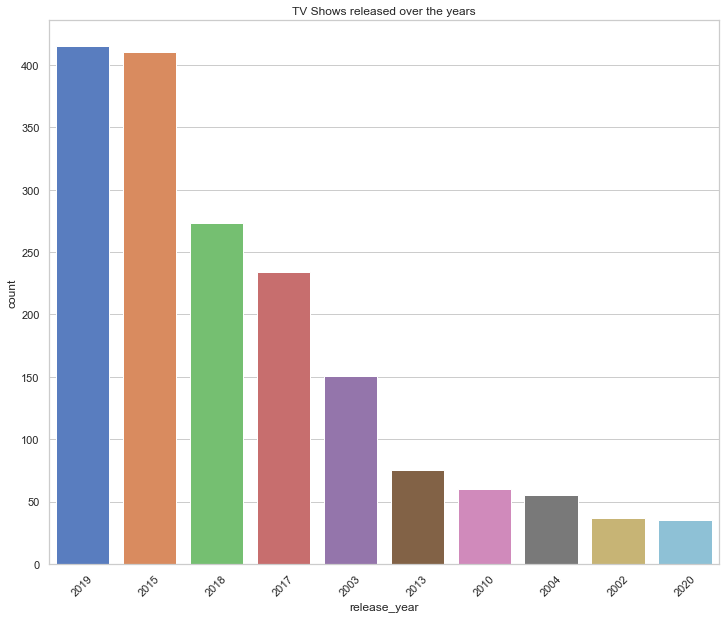

In [27]:
### Years with the most Tv Shows released
plt.figure(figsize=(12,10))
sns.set_theme(style='whitegrid')
ax=sns.countplot(x=df_s['release_year'],data=df_s,palette='muted',order=df_s['release_year'].value_counts().index[:10])
ax.set_xticklabels(df_s['release_year'].unique()[:10],rotation=45)
plt.title('TV Shows released over the years')                                                                                                                



Text(0.5, 1.0, 'The overall number of seasons shows aired')

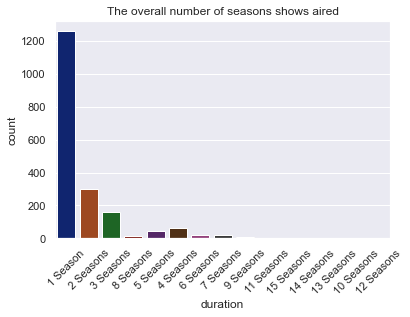

In [28]:
sns.set_theme(style='darkgrid')
ax=sns.countplot(x=df_s['duration'],data=df_s,palette="dark")
ax.set_xticklabels(df_s['duration'].unique(),rotation=45)
plt.title('The overall number of seasons shows aired')
### We can see that most shows on Netflix do not run for long maybeby popularity

In [29]:
df_s=df.loc[df['duration']=='15 Seasons']
df_s
## Grey's Anatomy and NCIS are the Longest Running Shows

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added
1109,70140391,Grey's Anatomy,N/A,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,N/A,2018,TV-14,15 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,TV Show,N/A
3160,70142386,NCIS,N/A,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,N/A,2017,TV-14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,TV Show,N/A


In [30]:
## Popular Genres of 2019
genres_19=list(df_19['listed_in'])
genres_19=' '.join(genres_19)



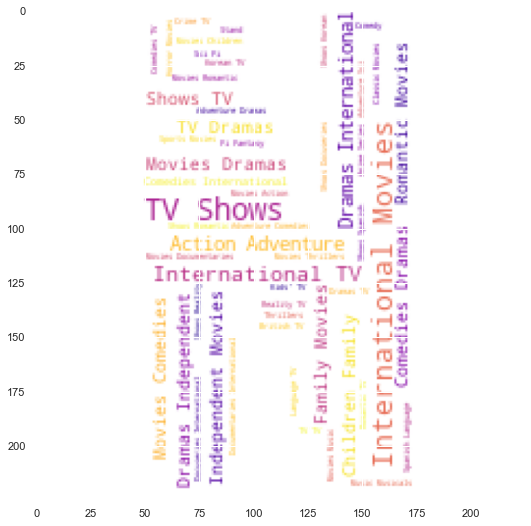

In [31]:
## Creating  A word cloud for genres for 2019
text = genres_19
mask_image = imageio.imread('Netflix Image_3.png')
plt.figure(figsize=[9,9])
wordcloud = WordCloud(colormap='plasma',mask=mask_image,background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('Netflix Image 2.png')
plt.imshow(wordcloud)

In [32]:
### genres for 2018
genres_18=list(df_18['listed_in'])
genres_18=' '.join(genres_18)


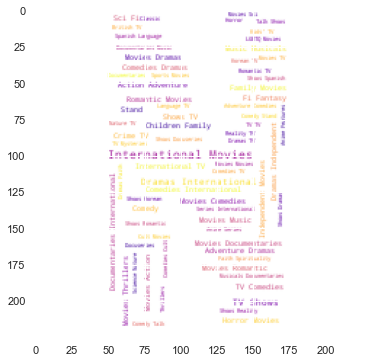

In [33]:
#### Word cloud for genres 2018
text = genres_18
mask_image = imageio.imread('Netflix Image_3.png')
plt.figure(figsize=[6,6])
wordcloud = WordCloud(colormap='plasma',mask=mask_image,background_color='white')
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('Netflix Image 3.png')
plt.imshow(wordcloud)

In [34]:
### Converting the description column to plain text
summary=list(df_19['description'])
summary=' '.join(summary)
summary

'Brought together by meaningful meals in the past and present, a doctor and a chef are reacquainted when they begin working at a hospice ward. From Sierra de las Minas to Esquipulas, explore Guatemala\'s cultural and geological wealth, including ancient Mayan cities and other natural wonders. A goofy copywriter unwittingly convinces the Indian cricket team that she’s their lucky mascot, to the dismay of their superstition-shunning captain. Arranged to marry a rich man, young Ada is crushed when her true love goes missing at sea during a migration attempt – until a miracle reunites them. Nollywood star Ramsey Nouah learns that someone is impersonating him and breaks out of a mental institution to expose the imposter. Romance, mystery and adventure intertwine as a young man falls in love and a severed hand scours Paris for its owner in this mesmerizing animated film. The life and times of iconic South African liberation fighter Solomon Mahlangu, who battled the forces of apartheid, come 

In [35]:
blob= TextBlob(summary)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words=stopwords.words('english')

In [39]:
add=['–',',','’','/',]
stop_words.extend(add)
items=blob.word_counts.items()
items=[item for item in items if item[0] not in stop_words ]
items

[('brought', 6),
 ('together', 32),
 ('meaningful', 1),
 ('meals', 1),
 ('past', 41),
 ('present', 4),
 ('doctor', 13),
 ('chef', 17),
 ('reacquainted', 1),
 ('begin', 12),
 ('working', 7),
 ('hospice', 1),
 ('ward', 2),
 ('sierra', 1),
 ('de', 7),
 ('las', 8),
 ('minas', 1),
 ('esquipulas', 1),
 ('explore', 14),
 ('guatemala', 1),
 ('cultural', 10),
 ('geological', 1),
 ('wealth', 4),
 ('including', 7),
 ('ancient', 12),
 ('mayan', 1),
 ('cities', 2),
 ('natural', 4),
 ('wonders', 2),
 ('goofy', 2),
 ('copywriter', 2),
 ('unwittingly', 4),
 ('convinces', 3),
 ('indian', 8),
 ('cricket', 4),
 ('team', 34),
 ('lucky', 2),
 ('mascot', 1),
 ('dismay', 1),
 ('superstition-shunning', 1),
 ('captain', 5),
 ('arranged', 3),
 ('marry', 16),
 ('rich', 11),
 ('man', 126),
 ('young', 139),
 ('ada', 1),
 ('crushed', 1),
 ('true', 48),
 ('love', 99),
 ('goes', 35),
 ('missing', 19),
 ('sea', 3),
 ('migration', 1),
 ('attempt', 11),
 ('miracle', 2),
 ('reunites', 6),
 ('nollywood', 1),
 ('star', 23)

In [40]:
## Creating a list of the polarity of the descriptions of various content added in 2019
a=[]
for i in blob.sentences:
    a.append(i.polarity)
print(a)
    

[0.08333333333333333, 0.025000000000000005, 0.41666666666666663, 0.17083333333333336, -0.1, 0.3, 0.25, 0.45, -0.35, 0.5, -0.15000000000000002, 0.0, -0.22499999999999998, 0.0, 0.0, 0.0, -0.3875, 0.0, 0.2, 0.2090909090909091, 0.26666666666666666, 0.7, 0.6, 0.29583333333333334, 0.0, -0.0625, 0.0, 0.16666666666666666, 0.14583333333333334, 0.04166666666666666, 0.0, 0.35, 0.6, 0.0, 0.0, -0.037500000000000006, 0.0, 0.1, 0.0, 0.06666666666666665, -0.11111111111111112, 0.0, 0.0, 0.0, -0.35833333333333334, 0.1, 0.0, 0.08333333333333333, -0.4212542087542088, -0.25, 0.38749999999999996, 0.5, 0.16, 0.2895021645021645, -0.125, -0.22121212121212122, 0.0, 0.1, 0.25, 0.0, 0.21999999999999997, 0.29000000000000004, 0.05500000000000001, -0.05, 0.06678571428571428, 0.0, 0.0, 0.030000000000000006, 0.1, 0.6, 0.0, 0.0, 0.2333333333333333, -0.10000000000000003, -0.175, 0.6, -0.024999999999999994, 0.0, 0.2606060606060606, 0.0, 0.025000000000000005, 0.5, 0.05, 0.0, 0.11250000000000002, 0.1722222222222222, -0.300

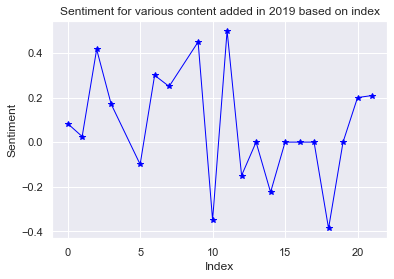

In [41]:
plt.plot(df_19.index[:20],a[:20], color='blue', marker='*',linewidth=1)
# add a title
plt.title("Sentiment for various content added in 2019 based on index")
# add a label to the y-axis
plt.ylabel("Sentiment")
plt.xlabel("Index")
plt.show()

In [42]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[0:20]
top20

[('life', 176),
 ('young', 139),
 ('new', 127),
 ('man', 126),
 ('family', 112),
 ('two', 106),
 ('world', 102),
 ('woman', 100),
 ('love', 99),
 ('friends', 83),
 ('one', 83),
 ('must', 81),
 ('school', 79),
 ('help', 77),
 ('documentary', 71),
 ('series', 69),
 ('father', 67),
 ('find', 67),
 ('home', 67),
 ('lives', 61)]

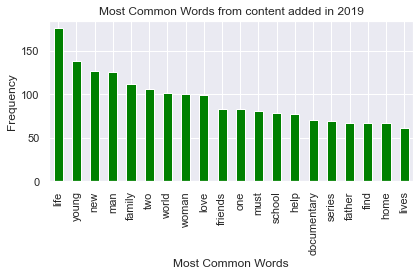

In [43]:
d= pd.DataFrame(top20, columns=['word', 'count'])
axes = d.plot.bar(x='word', y='count', legend=False,color = 'green')
plt.xlabel('Most Common Words')
plt.ylabel('Frequency')
plt.title('Most Common Words from content added in 2019')
plt.gcf().tight_layout()

In [44]:
summary_2=list(df_18['description'])
summary_2=' '.join(summary_2)
summary_2

'Bill Hicks remembers a wild night in 1989 and offers his views on puffing cigarettes, smoking weed, drinking, sex, commercials and music. This documentary about comedian Bill Hicks offers insight into his irreverent takes on, well, everything. Brother Steve Hicks is the star witness. In one of his most iconic performances, late comedian Bill Hicks demonstrates what made him such a singular talent and a force to be reckoned with. In his final recorded special, the iconoclastic comedian channels Goat Boy and tackles provocative topics like British porn, pot and the priesthood. Filmed in 1989 at a turning point in comedian Bill Hicks\'s career, this rare onstage performance captures him spouting off on a variety of topics. Late-night talk show host Conan O\'Brien hits the road in this special that brings him and his sense of humor to far-flung destinations. Frisbee national champion Brodie Smith challenges inventive athletes across the US to an exhibition match in the unconventional spor

In [45]:
blob_2= TextBlob(summary_2)

In [46]:
items=blob_2.word_counts.items()
items=[item for item in items if item[0] not in stop_words ]
items

[('bill', 8),
 ('hicks', 5),
 ('remembers', 2),
 ('wild', 12),
 ('night', 18),
 ('1989', 3),
 ('offers', 6),
 ('views', 4),
 ('puffing', 1),
 ('cigarettes', 2),
 ('smoking', 2),
 ('weed', 2),
 ('drinking', 2),
 ('sex', 23),
 ('commercials', 2),
 ('music', 26),
 ('documentary', 64),
 ('comedian', 44),
 ('insight', 1),
 ('irreverent', 7),
 ('takes', 53),
 ('well', 6),
 ('everything', 23),
 ('brother', 29),
 ('steve', 3),
 ('star', 29),
 ('witness', 3),
 ('one', 70),
 ('iconic', 8),
 ('performances', 5),
 ('late', 9),
 ('demonstrates', 3),
 ('made', 9),
 ('singular', 1),
 ('talent', 4),
 ('force', 19),
 ('reckoned', 2),
 ('final', 12),
 ('recorded', 2),
 ('special', 34),
 ('iconoclastic', 2),
 ('channels', 2),
 ('goat', 2),
 ('boy', 28),
 ('tackles', 2),
 ('provocative', 2),
 ('topics', 7),
 ('like', 13),
 ('british', 15),
 ('porn', 3),
 ('pot', 4),
 ('priesthood', 1),
 ('filmed', 2),
 ('turning', 6),
 ('point', 8),
 ('career', 26),
 ('rare', 6),
 ('onstage', 4),
 ('performance', 9),
 ('c

In [47]:
## Creating a list of the polarity of the descriptions of various content added in 2019
b=[]
for i in blob_2.sentences:
    b.append(i.polarity)
print(b)

[0.1, 0.05, 0.0, 0.175, 0.11904761904761905, 0.3, 0.35714285714285715, 0.5, 0.07222222222222223, 0.125, 0.044444444444444446, 0.0, 0.35714285714285715, 0.225, 0.4, -0.15, 0.0625, 0.8, 0.25, 0.15, 0.04999999999999999, 0.0, 0.5499999999999999, 0.2833333333333333, 0.0, -0.15496031746031746, 0.1875, 0.03333333333333333, 0.36818181818181817, 0.0, -0.4666666666666666, -0.125, 0.0, -0.00833333333333334, -0.15, 0.0, 0.3166666666666666, 0.1, 0.1, 0.0, 0.25, 0.7, 0.3, 0.05, 0.0, -0.15, 0.16666666666666666, 0.0, 0.0, 0.024999999999999984, 0.09166666666666666, -0.2, 0.0, -0.03125, 0.0, 0.1, 0.3090909090909091, 0.06818181818181818, 0.2676767676767677, -0.15833333333333335, -0.020000000000000004, -0.19428571428571428, 0.75, -0.06704545454545456, -0.4166666666666667, -0.04999999999999999, -0.019999999999999997, 0.0, 0.3, -0.1875, 0.0, -0.4, 0.1, 0.10833333333333332, -0.07333333333333333, 0.0, 0.0, -0.15416666666666667, -0.475, -0.14343434343434344, -0.049999999999999996, 0.0, 0.1, -0.0768518518518518

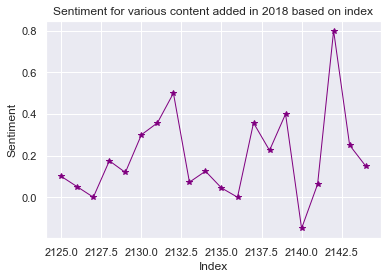

In [48]:
### Sentiment of content added in 2018 based on index
plt.plot(df_18.index[:20],b[:20], color='purple',marker='*',linewidth=1)
# add a title
plt.title("Sentiment for various content added in 2018 based on index")
# add a label to the y-axis
plt.ylabel("Sentiment")
plt.xlabel("Index")
plt.show()

In [49]:
# Top 20 common words found in the description for 2018 content
sorted_items_2 = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items_2[0:20]
top20

[('young', 166),
 ('life', 136),
 ('new', 113),
 ('two', 107),
 ('family', 105),
 ('woman', 102),
 ('world', 98),
 ('man', 97),
 ('love', 92),
 ('friends', 80),
 ('one', 70),
 ('find', 65),
 ('documentary', 64),
 ('school', 59),
 ('three', 58),
 ('father', 58),
 ('must', 58),
 ('finds', 58),
 ('takes', 53),
 ('series', 53)]

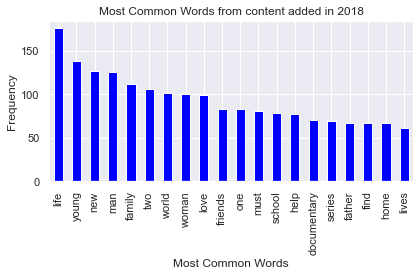

In [50]:
### bargraph showing the top 20 words found in description for 2018
d2= pd.DataFrame(top20, columns=['word', 'count'])
axes = d.plot.bar(x='word', y='count', legend=False,color = 'blue')
plt.xlabel('Most Common Words')
plt.ylabel('Frequency')
plt.title('Most Common Words from content added in 2018')
plt.gcf().tight_layout()